In [1]:
# https://www.youtube.com/watch?v=sG_WeGbZ9A4&t=221s 내용 필사함

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

Using TensorFlow backend.


In [2]:
np.version.version

'1.19.2'

In [3]:
data = pd.read_csv('LotteChemical_220104.csv')
data.head(), data.shape

(         Date      Open      High       Low     Close     Adj Close  Volume
 0  2017-01-04  382500.0  384500.0  370500.0  373500.0  335021.56250  124236
 1  2017-01-05  373500.0  374500.0  364000.0  372000.0  333676.06250  113002
 2  2017-01-06  369500.0  372000.0  367000.0  369500.0  331433.65625   75013
 3  2017-01-09  372500.0  386500.0  372000.0  381500.0  342197.40625  125560
 4  2017-01-10  378000.0  378500.0  373000.0  375000.0  336367.06250   88423,
 (1226, 7))

In [4]:
high_prices = data['High']
low_prices = data['Low']
mid_prices = (high_prices + low_prices)/2

In [5]:
# 최근 50일 데이터를 이용해 다음날 주가를 예측
# window size : 51
seq_len = 50
sequence_length = seq_len + 1

# result에 각 window를 저장
result = []
for index in range(len(mid_prices) - sequence_length) :
    
    result.append(np.array(mid_prices[index:index+sequence_length]).reshape(-1,1))

In [6]:
# 각 윈도우마다 정규화
scaler = MinMaxScaler()
normalized_data = []
for window in result :
    normalized_window = scaler.fit_transform(window)
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

In [7]:
# split train/test data : 0.9/0.1
row = int(round(result.shape[0]*0.9))
train = result[:row,:]
np.random.shuffle(train) # window를 shuffle 해줌

x_train = train[:,:-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[row:,:-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:,-1]

x_train.shape, x_test.shape

((1058, 50, 1), (117, 50, 1))

In [8]:
# build a model

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [9]:
 model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=10, epochs=20)

Train on 1058 samples, validate on 117 samples
Epoch 1/20
1058/1058 [==============================] - 4s 3ms/step - loss: 0.0564 - val_loss: 0.0330
Epoch 2/20
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0281 - val_loss: 0.0155
Epoch 3/20
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0185 - val_loss: 0.0391
Epoch 4/20
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0149 - val_loss: 0.0119
Epoch 5/20
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0127 - val_loss: 0.0103
Epoch 6/20
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0117 - val_loss: 0.0096
Epoch 7/20
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0112 - val_loss: 0.0088
Epoch 8/20
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0106 - val_loss: 0.0098
Epoch 9/20
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0109 - val_loss: 0.0096
Epoch 10/20
1058/1058 [============

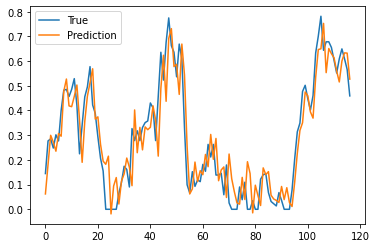

In [10]:
pred=model.predict(x_test)

fig = plt.figure(facecolor='white')
ax=fig.add_subplot(111)

ax.plot(y_test, label='True')
ax.plot(pred,label='Prediction')
ax.legend()
plt.show()